In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions_NLM import estimate_nested_logit, simulate_choice
from functions_geom_DIB import geom_DIB_on_alternatives

In [4]:
# Load data
data = pd.read_csv('../data/restaurants.dat', delimiter=',')
# display every column of the dataframe
pd.set_option('display.max_columns', None)
data

,ID,rating,price,category_Chinese,category_Japanese,category_Korean,category_Indian,category_French,category_Mexican,category_Lebanese,category_Ethiopian,Asian,rest_lat,rest_lon,distance,downtown
0,0,1,4,0,1,0,0,0,0,0,0,1.0,57.994604,42.220972,71.735518,1.0
1,1,2,2,0,0,1,0,0,0,0,0,1.0,93.474454,50.549434,106.267205,0.0
2,2,3,3,0,0,0,0,0,0,0,1,0.0,94.902294,97.830520,136.298409,0.0
3,3,4,1,1,0,0,0,0,0,0,0,1.0,51.027966,69.152206,85.941147,0.0
4,4,4,3,0,0,0,0,0,0,0,0,0.0,37.657349,89.145620,96.773021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,3,0,0,0,0,0,0,0,0,0.0,83.627288,9.511387,84.166441,0.0
96,96,1,1,0,0,0,0,0,0,0,0,0.0,25.475207,92.144641,95.601366,0.0
97,97,4,2,0,0,0,0,0,0,0,1,0.0,12.715702,27.657518,30.440555,1.0
98,98,4,4,1,0,0,0,0,0,0,0,1.0,31.367914,32.303213,45.027143,1.0


In [5]:
# Load data
data2 = pd.read_csv('../data/obs_choice.dat', delimiter=',')
# display every column of the dataframe
pd.set_option('display.max_columns', None)
data2

,user_lat,user_lon,logit_0,logit_1,logit_2,logit_3,logit_4,nested_0,nested_1,nested_2,nested_3,nested_4,cnl_0,cnl_1,cnl_2,cnl_3,cnl_4
0,29.658623,94.939628,10,37,54,44,75,28,34,10,48,94,44,37,16,70,34
1,11.143086,44.648300,54,87,53,74,70,30,88,93,39,82,54,11,10,39,63
2,59.937774,79.235164,35,42,40,76,21,12,12,99,16,44,35,30,44,82,26
3,89.859393,20.279733,82,94,51,54,34,9,50,26,35,39,10,76,82,44,78
4,22.618975,25.913081,40,43,37,30,23,40,82,35,35,97,2,35,42,91,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,47.243040,51.278399,10,0,34,30,27,90,40,30,94,23,29,44,30,53,30
9996,72.957844,86.053678,89,82,79,39,12,94,82,32,35,94,4,76,16,19,25
9997,5.057515,36.973306,6,3,20,81,54,16,79,88,32,24,35,94,34,54,11
9998,54.747056,93.820073,32,52,37,40,40,25,35,32,35,30,34,16,69,29,94


In [6]:
# min and max values of logit_0
min_logit_0 = data2['logit_0'].min()
max_logit_0 = data2['logit_0'].max()
print('min_logit_0:', min_logit_0)
print('max_logit_0:', max_logit_0)

min_logit_0: 0
max_logit_0: 99


In [7]:
beta_chinese_0 = 0.849
beta_ethiopian_0 = 0.489
beta_french_0 = 0.629
beta_indian_0 = 1.03
beta_japanese_0 = 1.28
beta_korean_0 = 0.753
beta_lebanese_0 = 0.853
beta_log_dist_0 = -0.602
beta_mexican_0 = 1.27
beta_price_0 = -0.4
beta_rating_0 = 0.743

In [8]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Compute differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Apply Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


In [9]:
# Compute the utilities for the 100 restaurant for one individual using the logit_0
user_0_lat = data2['user_lat'][0]
user_0_lon = data2['user_lon'][0]
rest_0_lat = data['rest_lat']
rest_0_lon = data['rest_lon']

# Initialize a list to store utilities for each restaurant
utilities = []

for i in range(100):
    distance = haversine(user_0_lat, user_0_lon, rest_0_lat[i], rest_0_lon[i])
    #Compute U_0 for restaurant 0, U_1 for restaurant 1, etc...
    U_i = beta_chinese_0 * data['category_Chinese'][i] + beta_ethiopian_0 * data['category_Ethiopian'][i] + \
           beta_french_0 * data['category_French'][i] + beta_indian_0 * data['category_Indian'][i] + \
           beta_japanese_0 * data['category_Japanese'][i] + beta_korean_0 * data['category_Korean'][i] + \
           beta_lebanese_0 * data['category_Lebanese'][i] + beta_mexican_0 * data['category_Mexican'][i] + \
           beta_price_0 * data['price'][i] + beta_rating_0 * data['rating'][i] + \
           beta_log_dist_0 * np.log(distance)
    
    # Append the utility to the list
    utilities.append(U_i)
print(utilities)

[-4.713909341846072, -3.8899458618135796, -3.8333720935711186, -1.4368530602349918, -2.4089291404238034, -5.7440537887643055, -4.235683132151159, -2.4782238989007235, -2.4511280173914107, -1.4112839931568177, -1.5094239043151294, -1.9661516327625916, -2.244601296950728, -3.753146247283814, -2.713486912386337, -3.8146331271242904, -0.5104967727744341, -2.150088883894811, -1.6901790601198434, -2.4990020644382094, -5.550616969170044, -1.4978097558924248, -3.5389815414033245, -3.199186526068381, -1.9744690966996812, -0.6905812077581985, -1.9650728303491998, -1.9717615874222645, -4.1467809089715155, -1.3463710338359376, -0.4986061794436507, -1.4847197155765808, -1.8809477447756948, -3.1317403260489596, -0.0428781282034576, -1.3461639645650245, -2.0319964276149864, -0.9100552106501114, -3.9923149346166564, -1.7750023426767694, -0.6240055788962726, -3.254935156456535, -1.4750156926573053, -4.7765043033412855, -0.3135021837345171, -2.753205827869306, -2.5477387656825075, -3.1480266410509152, -

In [10]:
# Initialize a dictionary to store utilities for all users
all_utilities = {}

# Iterate over each user
for user_idx in range(10000):
    # Get the latitude and longitude of the current user
    user_lat = data2['user_lat'][user_idx]
    user_lon = data2['user_lon'][user_idx]
    rest_lat = data['rest_lat']
    rest_lon = data['rest_lon']
    
    # Initialize a list to store utilities for the current user
    user_utilities = []
    
    # Iterate over each restaurant
    for i in range(100):
        # Compute the distance between the user and the restaurant
        distance = haversine(user_lat, user_lon, rest_lat[i], rest_lon[i])
        
        # Compute utility for the ith restaurant for the current user
        U_i = beta_chinese_0 * data['category_Chinese'][i] + \
              beta_ethiopian_0 * data['category_Ethiopian'][i] + \
              beta_french_0 * data['category_French'][i] + \
              beta_indian_0 * data['category_Indian'][i] + \
              beta_japanese_0 * data['category_Japanese'][i] + \
              beta_korean_0 * data['category_Korean'][i] + \
              beta_lebanese_0 * data['category_Lebanese'][i] + \
              beta_mexican_0 * data['category_Mexican'][i] + \
              beta_price_0 * data['price'][i] + \
              beta_rating_0 * data['rating'][i] + \
              beta_log_dist_0 * np.log(distance)
        
        # Append the utility to the list for the current user
        user_utilities.append(U_i)
    
    # Store the list of utilities for the current user in the dictionary
    all_utilities[user_idx] = user_utilities

# Now 'all_utilities' is a dictionary where keys are user indices and values are lists of utilities
# You can access the utilities associated with any specific user by using their index as the key, for example:
# utilities_for_user_3000 = all_utilities[3000]


In [11]:
# Initialize a dictionary to store utilities for all users
all_probabilities = {}

# Iterate over each user
for user_idx in range(10000):
    user_utilities = all_utilities[user_idx]

    # Compute the sum of exponentials of utilities
    sum_exp_utilities = sum([math.exp(U_i) for U_i in user_utilities])

    # Compute the probability of choosing each restaurant
    user_probabilities = [math.exp(U_i) / sum_exp_utilities for U_i in user_utilities]

    # Store the list of probabilities for the current user in the dictionary
    all_probabilities[user_idx] = user_probabilities

In [12]:
# make a dataset with the probabilities of each restaurant for each user, restaurant in columns, users in rows
df_probabilities = pd.DataFrame(all_probabilities)

#transpose the dataframe
df_probabilities = df_probabilities.T

#change the name of each column for P_i with i the number of the restaurant
df_probabilities.columns = ['P_' + str(i) for i in range(100)]

#add a column with the choice of each user
df_probabilities['choice'] = data2['logit_0']

#display the dataframe
df_probabilities

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20,P_21,P_22,P_23,P_24,P_25,P_26,P_27,P_28,P_29,P_30,P_31,P_32,P_33,P_34,P_35,P_36,P_37,P_38,P_39,P_40,P_41,P_42,P_43,P_44,P_45,P_46,P_47,P_48,P_49,P_50,P_51,P_52,P_53,P_54,P_55,P_56,P_57,P_58,P_59,P_60,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70,P_71,P_72,P_73,P_74,P_75,P_76,P_77,P_78,P_79,P_80,P_81,P_82,P_83,P_84,P_85,P_86,P_87,P_88,P_89,P_90,P_91,P_92,P_93,P_94,P_95,P_96,P_97,P_98,P_99,choice
0,0.000610,0.001389,0.001470,0.016152,0.006110,0.000218,0.000983,0.005701,0.005858,0.016570,0.015021,0.009514,0.007201,0.001593,0.004506,0.001498,0.040788,0.007915,0.012537,0.005584,0.000264,0.015197,0.001974,0.002772,0.009435,0.034066,0.009524,0.009460,0.001075,0.017681,0.041276,0.015397,0.010360,0.002966,0.065105,0.017685,0.008907,0.027353,0.001254,0.011518,0.036411,0.002622,0.015547,0.000573,0.049669,0.004330,0.005318,0.002918,0.001258,0.001666,0.009544,0.005533,0.027474,0.018894,0.006333,0.016320,0.000375,0.000675,0.004182,0.003963,0.002542,0.001332,0.003246,0.012372,0.002287,0.000304,0.004441,0.003149,0.002830,0.003589,0.022750,0.000572,0.008679,0.006969,0.000573,0.002259,0.020651,0.004078,0.014045,0.012745,0.004950,0.004071,0.018807,0.002861,0.001758,0.037962,0.003454,0.004300,0.017030,0.013273,0.003305,0.008394,0.001419,0.016097,0.036162,0.001993,0.002168,0.004659,0.003357,0.006473,10
1,0.000682,0.001342,0.001457,0.014076,0.002597,0.000214,0.000982,0.012683,0.005181,0.019388,0.010015,0.027696,0.006849,0.002001,0.005574,0.001705,0.019162,0.011421,0.023532,0.005164,0.000767,0.014204,0.003513,0.002727,0.016284,0.019515,0.009256,0.009170,0.001033,0.013467,0.044927,0.003839,0.030596,0.003830,0.023754,0.016248,0.009668,0.049120,0.001689,0.011581,0.025743,0.002201,0.014771,0.000482,0.034074,0.006142,0.014445,0.004036,0.002215,0.006619,0.016770,0.005272,0.008093,0.014028,0.013561,0.018334,0.000514,0.000629,0.003973,0.002293,0.005349,0.001890,0.003214,0.013131,0.002238,0.000308,0.003155,0.002448,0.002735,0.003276,0.037677,0.000571,0.005892,0.004623,0.001643,0.003305,0.021360,0.006372,0.009032,0.009798,0.005993,0.015856,0.016105,0.010644,0.001915,0.006866,0.004103,0.007646,0.020616,0.012667,0.010838,0.008138,0.001388,0.021661,0.033516,0.002001,0.000628,0.011897,0.006282,0.012118,54
2,0.000908,0.001790,0.001883,0.025865,0.003099,0.000302,0.001420,0.005281,0.015971,0.022704,0.007243,0.008112,0.009953,0.002033,0.005127,0.001993,0.015969,0.009040,0.012698,0.008530,0.000220,0.019580,0.001437,0.003451,0.006617,0.015682,0.013216,0.013988,0.001354,0.009719,0.062974,0.004150,0.009298,0.003675,0.024097,0.027349,0.013554,0.019760,0.000826,0.017922,0.066762,0.005762,0.020006,0.001055,0.031398,0.004916,0.004626,0.003477,0.001184,0.001394,0.009690,0.007210,0.007368,0.010362,0.005786,0.022664,0.000440,0.000860,0.005486,0.003819,0.002274,0.001533,0.005076,0.019966,0.002976,0.000422,0.003272,0.001708,0.003775,0.005325,0.017999,0.000900,0.004324,0.003626,0.000518,0.002584,0.030204,0.004422,0.014549,0.025132,0.006460,0.003487,0.035953,0.002411,0.002493,0.006981,0.004697,0.003532,0.022847,0.019529,0.002589,0.011397,0.002073,0.012288,0.052292,0.002739,0.000573,0.004234,0.003391,0.006398,35
3,0.000519,0.005332,0.004770,0.009232,0.001485,0.000701,0.002045,0.003668,0.005156,0.017051,0.004144,0.005408,0.027148,0.001529,0.002682,0.001001,0.009199,0.006764,0.008515,0.010192,0.000133,0.042065,0.000848,0.007015,0.004011,0.009336,0.034437,0.020039,0.003027,0.005329,0.032080,0.002131,0.005851,0.002820,0.012278,0.030551,0.006790,0.011733,0.000490,0.016827,0.020685,0.002466,0.051162,0.000600,0.015717,0.003909,0.002811,0.002413,0.000894,0.000858,0.005935,0.022183,0.004073,0.006423,0.004074,0.019709,0.000260,0.001695,0.017269,0.001707,0.001606,0.001168,0.004986,0.011776,0.010394,0.000685,0.001557,0.001041,0.088924,0.006792,0.010277,0.000830,0.002580,0.001949,0.000341,0.001824,0.032528,0.003288,0.005752,0.009805,0.005158,0.002273,0.020084,0.001575,0.001197,0.003795,0.003360,0.

In [13]:
# Compute AIC, BIC and log-likelihood for the model
log_likelihood = 0
n_parameters = 11
n_observations = 10000

# Iterate over each user
for user_idx in range(10000):
    user_probabilities = all_probabilities[user_idx]
    user_choice = data2['logit_0'][user_idx]
    log_likelihood += math.log(user_probabilities[user_choice])

AIC = -2 * log_likelihood + 2 * n_parameters
BIC = -2 * log_likelihood + n_parameters * math.log(n_observations)

print('AIC:', AIC)
print('BIC:', BIC)
print('Log-likelihood:', log_likelihood)

AIC: 82370.02899166285
BIC: 82449.34273575459
Log-likelihood: -41174.01449583143


In [14]:
df_input = data2[['user_lat', 'user_lon']]
# Calculate frequencies and probabilities
vector_counts = df_input.value_counts().reset_index(name='Frequency')
vector_counts['Probability'] = vector_counts['Frequency'] / len(df_input)

# Creating a tuple of attributes to facilitate mapping
vector_counts['tuple'] = vector_counts[['user_lat', 'user_lon']].apply(tuple, axis=1)
probability_map = vector_counts.set_index('tuple')['Probability'].to_dict()

# Assign the probability to each row based on its tuple of attributes
df_input['Probability'] = df_input.apply(lambda row: probability_map[tuple(row)], axis=1)

/var/folders/gk/16047hxn3hdgt8s5qmq_gnqh0000gp/T/ipykernel_866/842991067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['Probability'] = df_input.apply(lambda row: probability_map[tuple(row)], axis=1)


In [15]:
# Computation of p(x,y)
p_x = df_input['Probability'].values

p_y_given_x = np.array(list(all_probabilities.values()))
p_xy = p_x[:, np.newaxis] * p_y_given_x

# Normalize p_xy 
p_xy /= p_xy.sum()

# Define epsilon value
epsilon = 1e-20

# Add epsilon to elements equal to 0
p_xy[p_xy == 0] += epsilon

Iteration: 1 out of 200
Objective function value: 1.6094379124340978
H(T) =  1.6094379124340978
I(T;Y) =  0.0020239718845544985
Iteration: 2 out of 200
Objective function value: 1.172993472439512
H(T) =  1.172993472439512
I(T;Y) =  0.0006746935281718436
Iteration: 3 out of 200
Objective function value: 1.0275119924413165
H(T) =  1.0275119924413165
I(T;Y) =  0.00022494067601908085
Iteration: 4 out of 200
Objective function value: 0.9790181657752515
H(T) =  0.9790181657752515
I(T;Y) =  7.502965856254207e-05
Iteration: 5 out of 200
Objective function value: 0.962853556886563
H(T) =  0.962853556886563
I(T;Y) =  2.5065919187383656e-05
Iteration: 6 out of 200
Objective function value: 0.9574653539236669
H(T) =  0.9574653539236669
I(T;Y) =  8.4179387283001e-06
Iteration: 7 out of 200
Objective function value: 0.9556692862693682
H(T) =  0.9556692862693682
I(T;Y) =  2.875209905717213e-06
Iteration: 8 out of 200
Objective function value: 0.9550705970512686
H(T) =  0.9550705970512686
I(T;Y) =  1.

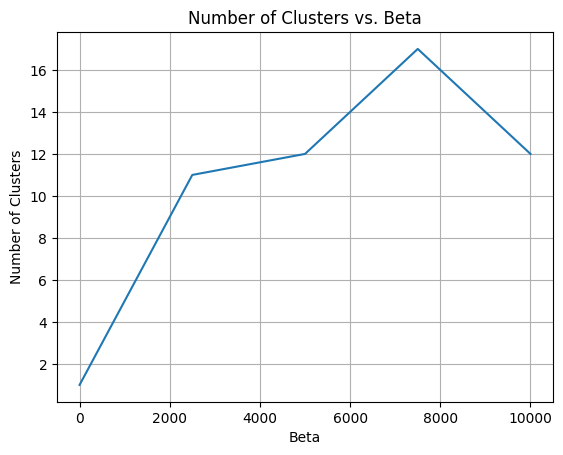

In [102]:
betas = np.linspace(0, 10000, 5)
# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB_on_alternatives(p_xy, max_iter=200, beta=beta, threshold=1e-20)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

In [107]:
q_t_given_x, q_t, q_y_given_t = geom_DIB_on_alternatives(p_xy, beta=1000, max_iter=1000, threshold=1e-20)

Iteration: 1 out of 1000
Objective function value: -0.41453397212040066
H(T) =  1.6094379124340978
I(T;Y) =  0.0020239718845544985
Iteration: 2 out of 1000
Objective function value: 0.4982999442676683
H(T) =  1.172993472439512
I(T;Y) =  0.0006746935281718436
Iteration: 3 out of 1000
Objective function value: 0.8025713164222357
H(T) =  1.0275119924413165
I(T;Y) =  0.00022494067601908085
Iteration: 4 out of 1000
Objective function value: 0.9039885072127094
H(T) =  0.9790181657752515
I(T;Y) =  7.502965856254207e-05
Iteration: 5 out of 1000
Objective function value: 0.9377876376991794
H(T) =  0.962853556886563
I(T;Y) =  2.5065919187383656e-05
Iteration: 6 out of 1000
Objective function value: 0.9490474151953668
H(T) =  0.9574653539236669
I(T;Y) =  8.4179387283001e-06
Iteration: 7 out of 1000
Objective function value: 0.952794076363651
H(T) =  0.9556692862693682
I(T;Y) =  2.875209905717213e-06
Iteration: 8 out of 1000
Objective function value: 0.9540363694206212
H(T) =  0.9550705970512686
I

In [16]:
import re

# Define a function to extract the number from the column name
def extract_number(column_name):
    match = re.search(r'\d+', column_name)  # Search for one or more digits in the column name
    if match:
        return int(match.group())  # Return the first occurrence of digits as an integer
    else:
        return None  # Return None if no digits are found

In [17]:
# Calculate the number of clusters
column_sum = np.sum(q_t_given_x, axis=0)
num_clusters = np.count_nonzero(column_sum)
print('Number of clusters :', num_clusters)


NameError: name 'q_t_given_x' is not defined

In [60]:

# Count the number of observations in each cluster
df_probabilities['cluster'] = np.argmax(q_t_given_x, axis=1)
print('\n', df_probabilities['cluster'].value_counts())

# number of each alternative 1, 2, 3, 4, 5 in each cluster 
cluster_counts = df_probabilities.groupby(['cluster', 'choice']).size().unstack(fill_value=0)
print('\n', cluster_counts)

# maximal probability for each individual in the dataframe 
df_probabilities['max_proba'] = df_probabilities[['P_0', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99']].max(axis=1)
cluster_counts2 = df_probabilities.groupby(['cluster', 'max_proba']).size().unstack(fill_value=0)
print('\n', cluster_counts2)

ValueError: Length of values (100) does not match length of index (10000)